In [ ]:
# source : https://stackoverflow.com/questions/25141250/how-to-truncate-a-numpy-scipy-exponential-distribution-in-an-efficient-way

In [1]:
import scipy.optimize as so
import scipy.stats as scp
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Asus\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def trunc_exp_rv(low, high, scale, size):
    rnd_cdf = np.random.uniform(scp.expon.cdf(x=low, scale=scale),
                                scp.expon.cdf(x=high, scale=scale),
                                size=size)
    return scp.expon.ppf(q=rnd_cdf, scale=scale)
def solve_for_l(low, high, ept_mean):
    A = np.array([low, high])
    return 1/so.fmin(lambda L: ((np.diff(np.exp(-A*L)*(A*L+1)/L)/np.diff(np.exp(-A*L)))-ept_mean)**2,
                     x0=0.5,
                     full_output=False, disp=False)
def F(low, high, ept_mean, size):
    return trunc_exp_rv(low, high,
                        solve_for_l(low, high, ept_mean),
                        size)


3.0976675522412718


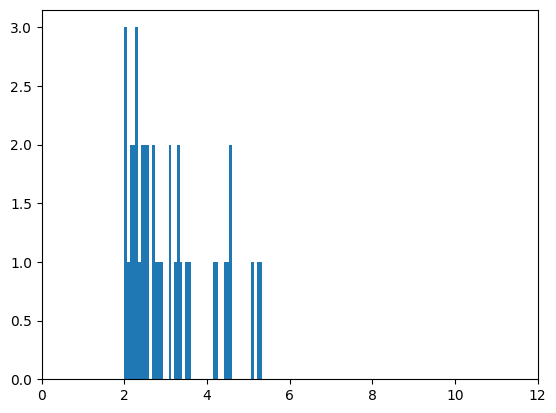

In [7]:
iti_learning = F(2, 6, 3, 40)
plt.hist(iti_learning, bins=50)
plt.xlim(0, 12)
print(iti_learning.mean())

In [17]:
np.savetxt('iti_randomization.csv', iti_learning, delimiter=',', fmt = '%.4f', header='iti', comments='')

2.982628089148215


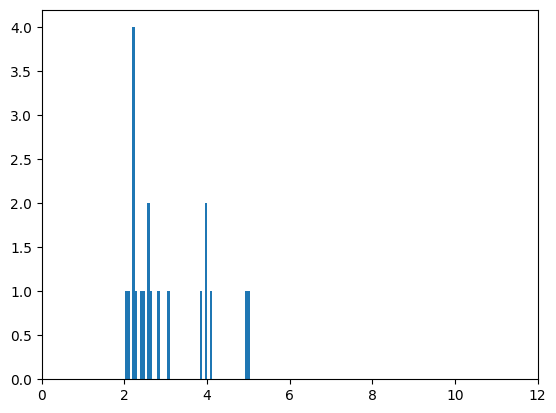

In [47]:
guess_delay = F(2, 6, 3, 20)
plt.hist(guess_delay, bins=50)
plt.xlim(0, 12)
print(guess_delay.mean())

In [48]:
np.savetxt('guess_random_delay.csv', guess_delay, delimiter=',', fmt = '%.4f', header='delay', comments='')

2.993974410813273


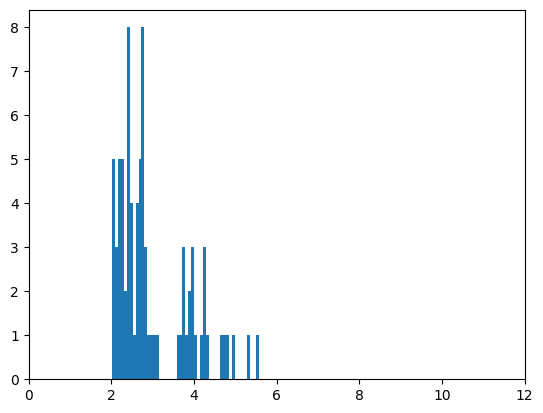

In [68]:
iti_sm = F(2, 6, 3, 80)
plt.hist(iti_sm, bins=50)
plt.xlim(0, 12)
print(iti_sm.mean())

In [69]:
np.savetxt('sm_iti_randomization.csv', iti_sm, delimiter=',', fmt = '%.4f', header = 'iti', comments='')